# Machine Learning With Random Forests And Decision Trees: A Visual Guide For Beginners

## LIB'S

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# CHAPTER 01

In [5]:
# set the random seed
np.random.seed(12345)

#load dataset
iris = load_iris()
X = iris.data
y = iris.target

#model
model = RandomForestClassifier()

#train
clf = model.fit(X, y)

In [8]:
# shape
print(X.shape, y.shape)

(150, 4) (150,)


<ipython-input-6-e67062a86f21>:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fruit = fruit.astype(np.float)
<ipython-input-6-e67062a86f21>:78: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = fruit[:,pair].astype(np.float)


NameError: name 'xrange' is not defined

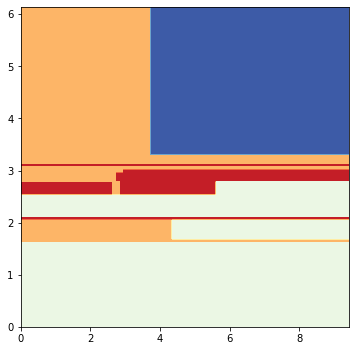

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import clone
from sklearn.ensemble import RandomForestClassifier
from six import StringIO
#from sklearn.externals.six.moves import xrange
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 4
n_estimators = 9
plot_colors = ('r','orange','yellow','blue')
markers = ('D','s','^','o')

cmap = plt.cm.RdYlBu
#cmap = plt.cm.hsv


plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration


# Load fruit data
fruit_file = open('/Users/daianeklein/Downloads/Random_Forest_Final_Programs/Random_Forest_Examples.csv','r')
next(fruit_file)
fruit = []

for line in fruit_file:
    fruit.append(line.strip().split(','))

rows = len(fruit)
columns = len(fruit[0])
    
fruit = np.array(fruit)

for column in range(0,columns ):
    # loop through all the rows and columns, replace
    # categories with floats
    cnt1 = 0
    categories = {}
    for row in range(0,rows):
        if (row == 0): 
           try:
               num = float( fruit[row,column] )
               # if this is a number, break from the loop
               break
           except:
               pass
        
        item = fruit[row,column]
        if (item not in categories):
            # see if we already have an item of this category
            #  basically, change apples to 1, bananas to 2, oranges to 3
            #  etc
            categories[item] = cnt1
            cnt1+=1
        fruit[row,column] = categories[item]

    if (column == 0):
        labels = {}
        for key, value in categories.items():
            # labels for the legend in the plots
            labels[int(value)] = key


fruit = fruit.astype(np.float)

plot_idx = 1

models = [ RandomForestClassifier(n_estimators=n_estimators)  ]

pair = [1,2]
for model in models:
    plt.figure(figsize=(20,20))
    # We only take use 2 of the features to make it easier to plot
    X = fruit[:,pair].astype(np.float)
    y = fruit[:,0]
    
    np.random.seed(RANDOM_SEED)


    # Train
    clf = clone(model)
    clf = model.fit(X, y)

    scores = clf.score(X, y)
    
    plt.title('Decision Trees of A Random Forest - Length vs. Width')

    # Now plot the decision boundary using a fine mesh as input to a
    # filled contour plot
    x_min, x_max = 0, X[:, 0].max() + 1
    y_min, y_max = 0, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    # Plot either a single DecisionTreeClassifier or alpha blend the
    # decision surfaces of the ensemble of classifiers
    if isinstance(model, DecisionTreeClassifier):
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=cmap)
        #cs = plt.contourf(xx, yy, Z, colors=('r','g','b','y'))
    else:
        # Choose alpha blend level with respect to the number of estimators
        # that are in use (noting that AdaBoost can use fewer estimators
        # than its maximum if it achieves a good enough fit early on)
        estimator_alpha = 1.0 / len(model.estimators_)
        for tree in model.estimators_:
            
            plt.subplot(3, 3, plot_idx)
            
            Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, alpha=1.0, cmap=cmap)

            # Plot the training points, these are clustered together and have a
            # black outline
            for i, c in zip(xrange(n_classes), plot_colors):
                idx = np.intersect1d(np.where(y == i),np.where(tree.indices_ == True))
                plt.scatter(X[idx, 0], X[idx, 1], c=c, cmap=cmap,s=60,marker=markers[i],
                            label=labels[i])
            
            plot_idx+=1

    
    plt.show()

